In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## (a) Interesting patterns in the data

In [4]:
df = pd.read_csv('/Users/sunheepark/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')
df = df.sort_values(by = 'CRASH DATE').reset_index(drop = True)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(1750704, 29)

In [6]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2013,15:30,QUEENS,11358,40.767764,-73.789317,"(40.7677638, -73.7893167)",33 AVENUE,JORDAN STREET,NaN,...,NaN,NaN,NaN,NaN,260764,MOTORCYCLE,NaN,NaN,NaN,NaN
1,01/01/2013,8:35,BROOKLYN,11212,40.662836,-73.917750,"(40.6628356, -73.9177502)",GRAFTON STREET,DUMONT AVENUE,NaN,...,Unspecified,Unspecified,Unspecified,NaN,161082,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN
2,01/01/2013,5:15,BRONX,10461,40.840216,-73.848434,"(40.840216, -73.8484338)",SEDDON STREET,ST RAYMONDS AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,89554,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,01/01/2013,3:15,BROOKLYN,11212,40.660598,-73.920910,"(40.6605981, -73.9209104)",CLARKSON AVENUE,EAST 96 STREET,NaN,...,Unspecified,NaN,NaN,NaN,136733,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
4,01/01/2013,4:00,NaN,NaN,NaN,NaN,NaN,EDWARD L GRANT HIGHWAY,WEST 170 STREET,NaN,...,Unspecified,NaN,NaN,NaN,86194,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN


In [7]:
# remove rows which do not contain exact CRASH DATE
df = df.iloc[3:664073,:].reset_index(drop=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664070 entries, 0 to 664069
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     664070 non-null  object 
 1   CRASH TIME                     664070 non-null  object 
 2   BOROUGH                        464035 non-null  object 
 3   ZIP CODE                       463949 non-null  object 
 4   LATITUDE                       577296 non-null  float64
 5   LONGITUDE                      577296 non-null  float64
 6   LOCATION                       577296 non-null  object 
 7   ON STREET NAME                 529980 non-null  object 
 8   CROSS STREET NAME              436702 non-null  object 
 9   OFF STREET NAME                99322 non-null   object 
 10  NUMBER OF PERSONS INJURED      664062 non-null  float64
 11  NUMBER OF PERSONS KILLED       664056 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED 

In [9]:
# convert object -> datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df = df.sort_values(by = 'CRASH DATE').reset_index(drop=True)

In [10]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2013-01-01,3:15,BROOKLYN,11212,40.660598,-73.920910,"(40.6605981, -73.9209104)",CLARKSON AVENUE,EAST 96 STREET,NaN,...,Unspecified,NaN,NaN,NaN,136733,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,2013-01-01,17:15,QUEENS,11420,40.682006,-73.816056,"(40.6820056, -73.8160555)",111 AVENUE,125 STREET,NaN,...,Unspecified,NaN,NaN,NaN,229481,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,2013-01-01,10:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D/W 430 KISSELL AVE,...,Unspecified,NaN,NaN,NaN,286686,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
3,2013-01-01,11:36,NaN,NaN,40.680696,-74.002966,"(40.6806961, -74.0029655)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2975962,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,2013-01-01,1:30,BRONX,10456,40.822714,-73.903140,"(40.8227143, -73.9031399)",EAST 163 STREET,TINTON AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,79250,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [95]:
pd.DataFrame(df['BOROUGH'].values).value_counts()#.drop_duplicate

BROOKLYN         145790
QUEENS           124290
MANHATTAN        106665
BRONX             67446
STATEN ISLAND     19844
dtype: int64

In [13]:
CRASH_TIME = df.groupby('CRASH DATE').count()['CRASH TIME']
CRASH_TIME

CRASH DATE
2013-01-01    378
2013-01-02    480
2013-01-03    549
2013-01-04    505
2013-01-05    389
             ... 
2021-01-22    233
2021-01-23    233
2021-01-24    200
2021-01-25    225
2021-01-26    218
Name: CRASH TIME, Length: 1229, dtype: int64

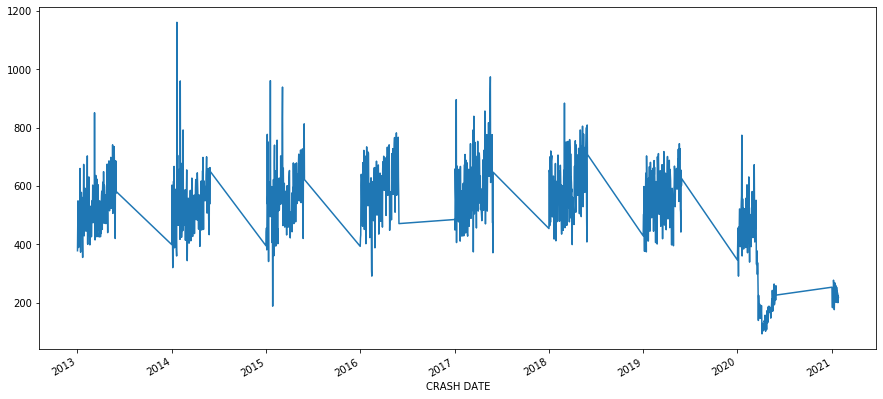

In [26]:
# Visualizing how many traffic accidents have occurred by date
plt.figure(figsize = (15,7))
CRASH_TIME.plot()
plt.show()

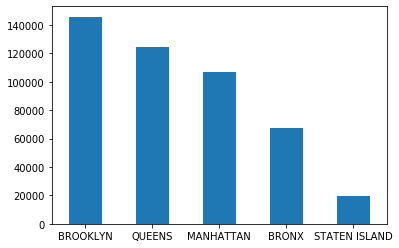

In [56]:
location_frequency = df['BOROUGH'].value_counts()
location_frequency.plot.bar(rot=0)

count    1229.000000
mean      540.333605
std       143.703519
min        93.000000
25%       479.000000
50%       560.000000
75%       630.000000
max      1161.000000
Name: CRASH TIME, dtype: float64


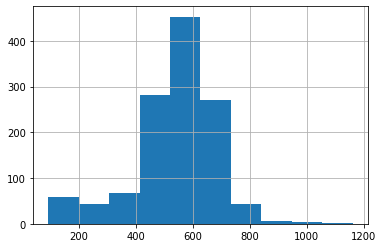

In [27]:
print(CRASH_TIME.describe())
CRASH_TIME.hist()

In [57]:
# mean value of crash per day is 540.3336045565501
CRASH_TIME.describe()['mean']

540.3336045565501

In [58]:
# Accident frequency by date which is more than mean values
more_than_mean = CRASH_TIME[CRASH_TIME.sort_values(ascending = False) > CRASH_TIME.describe()['mean']]
more_than_mean

CRASH DATE
2013-01-03    549
2013-01-10    555
2013-01-11    660
2013-01-14    542
2013-01-16    578
             ... 
2020-03-02    562
2020-03-03    550
2020-03-06    673
2020-03-09    545
2020-03-13    551
Name: CRASH TIME, Length: 698, dtype: int64

In [96]:
# Cases can be divided into 'ON STREET NAME' and 'OFF STREET NAME'
# Cases - 'ON STREET NAME' with 'CROSS STREET NAME'
df[['ON STREET NAME','CROSS STREET NAME']].value_counts()

ON STREET NAME                    CROSS STREET NAME               
FLATBUSH AVENUE                   GRAND ARMY PLAZA                    150
WEST 42 STREET                    8 AVENUE                            139
EAST 57 STREET                    3 AVENUE                            130
BRUCKNER BOULEVARD                EAST 138 STREET                     129
FLATBUSH AVENUE EXTENSION         TILLARY STREET                      124
                                                                     ... 
ALBION PLACE                      PORT RICHMOND AVENUE                  1
                                  PORT RICHMOND AVENUE                  1
SCHIEFFELIN PLACE                 EAST 229 STREET                       1
ALBION PLACE                      HEBERTON AVENUE                       1
zarega  avuenue                   gleason avenue                        1
Length: 111822, dtype: int64

In [31]:
# Case - 'OFF STREET NAME' 
df['OFF STREET NAME'][df['OFF STREET NAME'].notnull()].value_counts()

772       EDGEWATER ROAD                    170
110-00    ROCKAWAY BOULEVARD                117
2800      VICTORY BOULEVARD                  87
BROADWAY                                     71
PARKING LOT 110-00 ROCKAWAY BOULEVARD        68
                                           ... 
PARKING LOT OF 67-35 KISSENA BLVD             1
6         SUTTER AVENUE                       1
89-30     QUEENS BOULEVARD                    1
16        ASTOR AVENUE                        1
224       EAST 27 STREET                      1
Name: OFF STREET NAME, Length: 72989, dtype: int64

In [32]:
CONTRI_FACTORS = df[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5']]
CONTRI_FACTORS

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
0,Unspecified,Unspecified,NaN,NaN,NaN
1,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN
2,Unspecified,Unspecified,NaN,NaN,NaN
3,Unspecified,NaN,NaN,NaN,NaN
4,Unspecified,Unspecified,NaN,NaN,NaN
...,...,...,...,...,...
664065,Unspecified,NaN,NaN,NaN,NaN
664066,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN
664067,Backing Unsafely,Unspecified,NaN,NaN,NaN
664068,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN


In [60]:
# fill null values with 'Unspecified'
CONTRI_FACTORS.fillna({'CONTRIBUTING FACTOR VEHICLE 1':'Unspecified',
                       'CONTRIBUTING FACTOR VEHICLE 2':'Unspecified',
                      'CONTRIBUTING FACTOR VEHICLE 3':'Unspecified',
                      'CONTRIBUTING FACTOR VEHICLE 4':'Unspecified',
                      'CONTRIBUTING FACTOR VEHICLE 5':'Unspecified'}, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [61]:
FACTOR1 = CONTRI_FACTORS['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
FACTOR2 = CONTRI_FACTORS['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()
FACTOR3 = CONTRI_FACTORS['CONTRIBUTING FACTOR VEHICLE 3'].value_counts()
FACTOR4 = CONTRI_FACTORS['CONTRIBUTING FACTOR VEHICLE 4'].value_counts()
FACTOR5 = CONTRI_FACTORS['CONTRIBUTING FACTOR VEHICLE 5'].value_counts()

## (b) Visualize Results

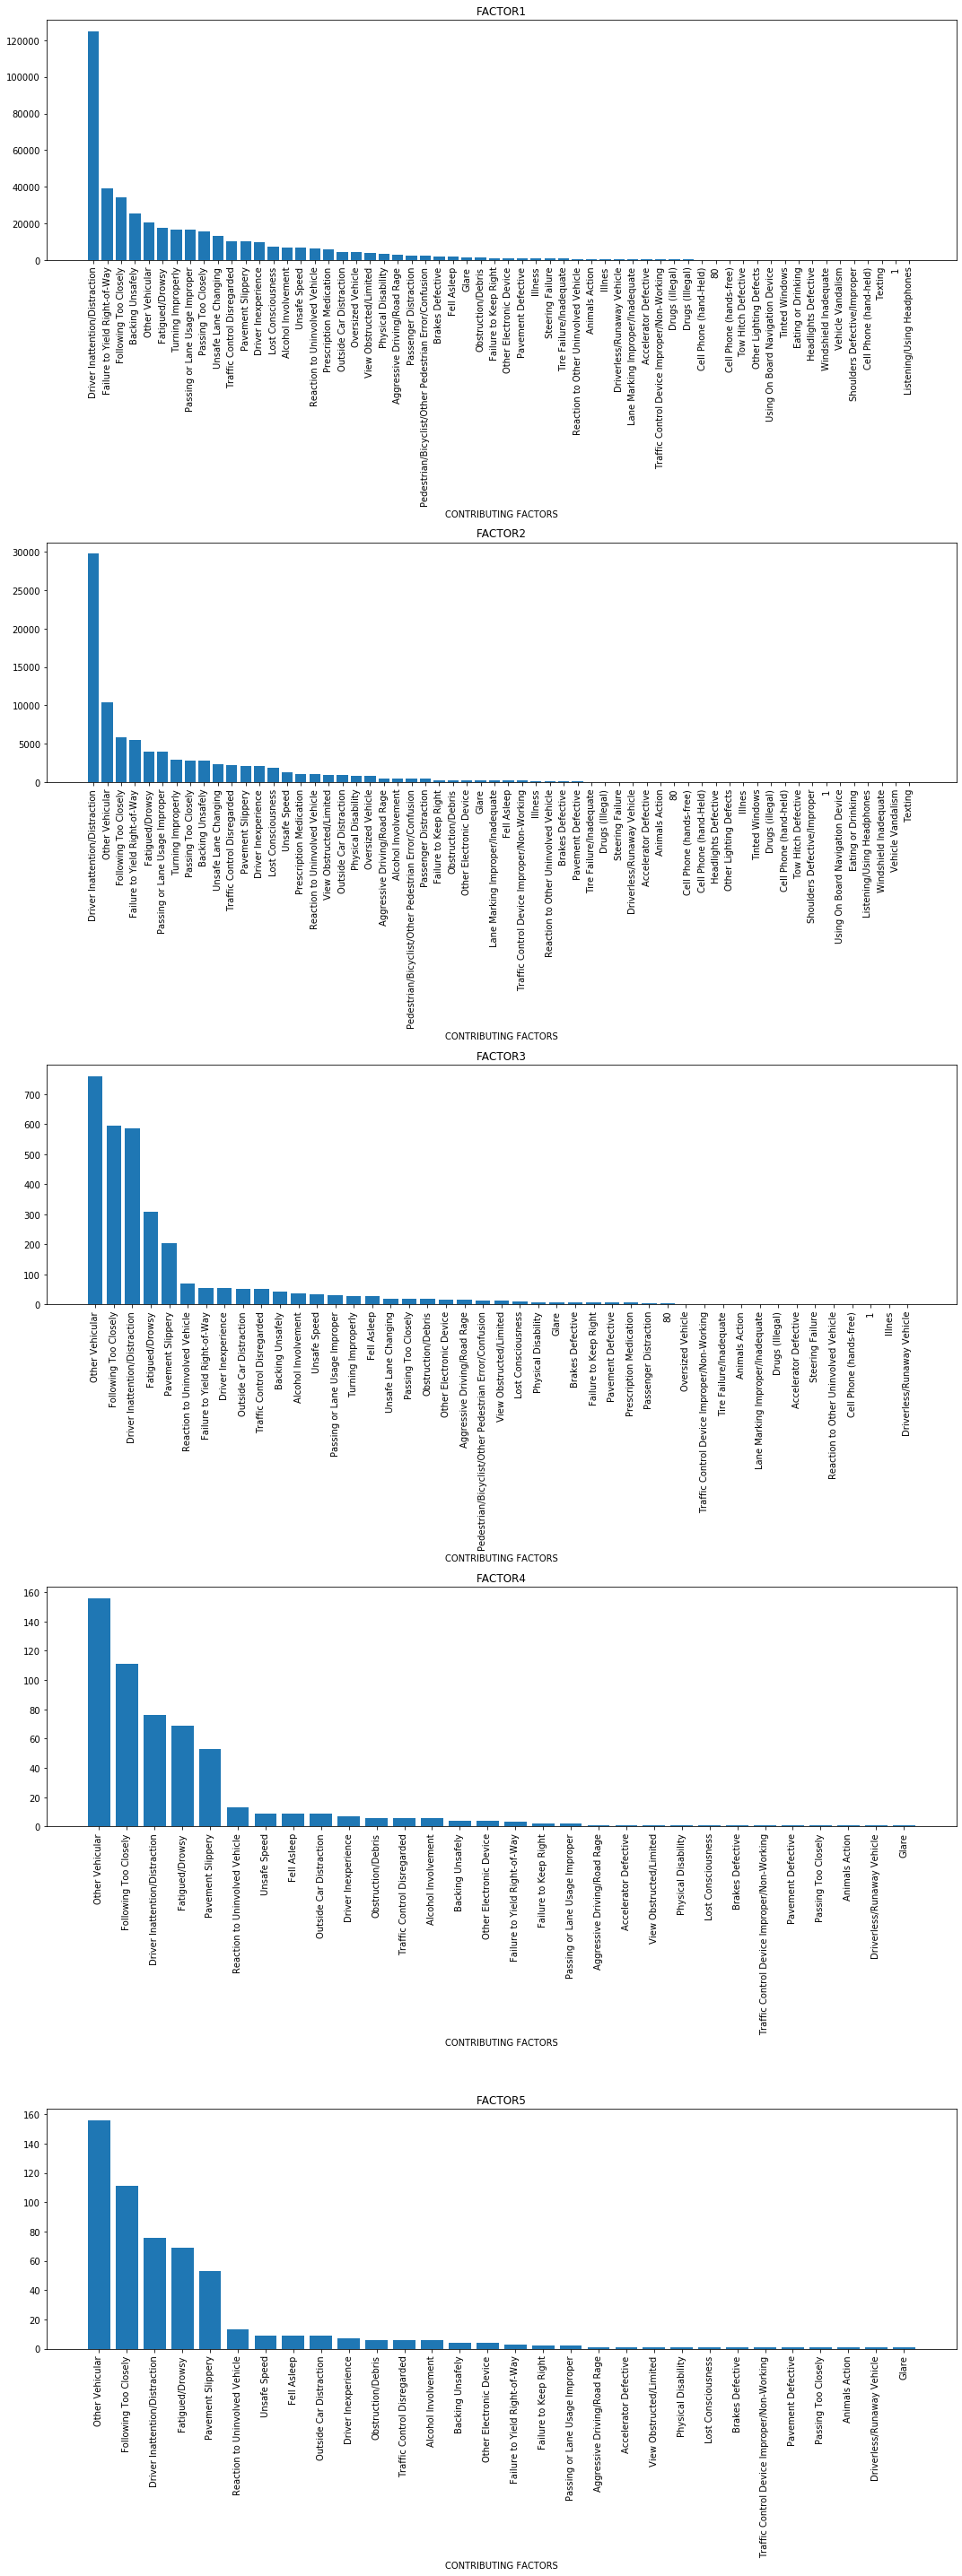

In [62]:
fig = plt.figure(figsize = (15,40))

ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)


# ax1
ax1.bar(FACTOR1.drop(['Unspecified']).index, FACTOR1.drop(['Unspecified']).values)
# ax2
ax2.bar(FACTOR2.drop(['Unspecified']).index, FACTOR2.drop(['Unspecified']).values)
# ax3
ax3.bar(FACTOR3.drop(['Unspecified']).index, FACTOR3.drop(['Unspecified']).values)
# ax4
ax4.bar(FACTOR4.drop(['Unspecified']).index, FACTOR4.drop(['Unspecified']).values)
# ax5
ax5.bar(FACTOR4.drop(['Unspecified']).index, FACTOR4.drop(['Unspecified']).values)

# set titles
ax1.set_title('FACTOR1')
ax2.set_title('FACTOR2')
ax4.set_title('FACTOR4')
ax5.set_title('FACTOR5')
ax3.set_title('FACTOR3')

# set x-axis label
ax1.set_xlabel('CONTRIBUTING FACTORS')
ax2.set_xlabel('CONTRIBUTING FACTORS')
ax4.set_xlabel('CONTRIBUTING FACTORS')
ax5.set_xlabel('CONTRIBUTING FACTORS')
ax3.set_xlabel('CONTRIBUTING FACTORS')

# rotate x-axis 
ax1.tick_params (axis = 'x', labelrotation = 90)
ax2.tick_params (axis = 'x', labelrotation = 90)
ax4.tick_params (axis = 'x', labelrotation = 90)
ax5.tick_params (axis = 'x', labelrotation = 90)
ax3.tick_params (axis = 'x', labelrotation = 90)

plt.tight_layout()
plt.show()

## (c) Write one paragraph summarizing the results

From Visualization of 'how many traffic accidents have occurred by date', it seems like that most traffic accidents have happened from the start of the year to about June-July. From the mid of the year, cases keep decreased. Among the five boroughes (BROOKLYN , QUEENS, MANHATTAN, BRONX, STATEN ISLAND) BROOKLYN, QUEENS and MANHATTAN shows high records compared with BRONX and STATEN ISLAND. Especially, BROOKLYN(145,790) shows about 7.3 times of traffic accidents in STATEN ISLAND(19,844). According to data, most traffic accidents have happened in FLATBUSH AVENUE GRAND ARMY PLAZA(Flatbush Ave, Brooklyn, NY 11238) when data is arranged with 'ON STREET NAME','CROSS STREET NAME’ columns. When traffic accidents data is arranged with 'OFF STREET NAME’, the most cases have happend in 772 Edgewater Rd, The Bronx, NY 10474. About contributing factors, there are five factors what affect traffic accidents. From factor 1 to factor 5, 'Drivier Inattention/Distraction' seems like the main factor. In factor 1 and 2, Drivier Inattention/Distraction is top-ranked. In factor 3,4 and 5, Drivier Inattention/Distraction is also ranked as 3rd main factor of traffic accidents. 

## (d) The NYC City Council proposes a ban on cellphone use by taxi drivers. Will this measure meaningfully reduce accidents and/or fatalities?

### There are three options related with Cell Phone - __Cell Phone (hands-free)/Cell Phone (hand-Held)/Cell Phone (hand-held)__

In [176]:
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hands-free)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hand-Held)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hand-held)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))

print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hands-free)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hand-Held)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hand-held)')& (df['VEHICLE TYPE CODE 1'] == 'Taxi')]))

print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hands-free)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hand-Held)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 1'] == 'Cell Phone (hand-held)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))

print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hands-free)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hand-Held)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))
print(len(df[(df['CONTRIBUTING FACTOR VEHICLE 2'] == 'Cell Phone (hand-held)')& (df['VEHICLE TYPE CODE 2'] == 'Taxi')]))

5
6
0
1
2
0
1
1
0
0
2
0


### According to the several results with 'Taxi' and 'Cell Phone', there are just a few cases of traffic accidents. It means if NYC City Council proposes a ban on cellphone use by taxi drivers, __it will not meaningfully reduce accidents__.